In [305]:
import xml.etree.cElementTree
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import subprocess
import os
%matplotlib inline


# --------------- Latex Plot Beautification --------------------------
fig_width = 6
fig_height = 8
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 16,
          'font.size': 16,
          'legend.fontsize': 16,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------


{'max': '1000', 'direction': 'x', 'numberOfBins': '500', 'min': '1'}
Energy, from source, kev  has 48239.0 values
{'max': '1000', 'direction': 'x', 'numberOfBins': '500', 'min': '1'}
Energy, main detector, kev  has 408.0 values
{'max': '1000', 'direction': 'x', 'numberOfBins': '500', 'min': '1'}
Energy, side detector, kev  has 30.0 values


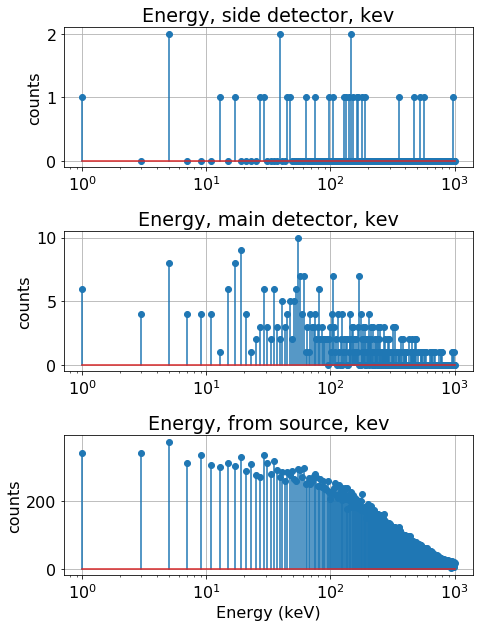

In [392]:
# Run it
subprocess.call('./go.sh', shell=True)

# Get histograms from XML output
filename = 'doop.xml'
e = xml.etree.cElementTree.parse(filename).getroot()

hists = dict()
axes  = dict()
underflows = dict()
overflows = dict()
for hist in e.findall('histogram1d'):
    axis_info = hist.findall('axis')[0].attrib
    print axis_info
#     bin_vals = pow(10,np.linspace(float(axis_info['min']), float(axis_info['max']), int(axis_info['numberOfBins'])))
    bin_vals = np.linspace(float(axis_info['min']), float(axis_info['max']), int(axis_info['numberOfBins']))


    title = hist.attrib['title']
    
#     print bin_vals
    cur_hist = np.zeros_like(bin_vals)
    for cell in hist.findall('data1d')[0]:
        try:
            binN=int(cell.attrib['binNum'])
            binH=int(cell.attrib['height'])
            cur_hist[binN] = binH
        except:
            if 'UNDERFLOW' in cell.attrib['binNum']:
                underflows[title] = int(cell.attrib['height'])
            if 'OVERFLOW' in cell.attrib['binNum']:
                overflows[title] = int(cell.attrib['height'])
    hists[title] = cur_hist
    axes[title]  = bin_vals

    print title, " has", np.sum(cur_hist), "values"

    
# ---------- Plot it -------------

key = hists.keys()[0]

fig, ax = plt.subplots(len(hists.keys()),1)

for k_ind, key in enumerate(hists.keys()):

    ax[k_ind].stem(axes[key], hists[key],zorder=100, alpha=0.7)
    ax[k_ind].set_title(key)
    ax[k_ind].set_ylabel('counts')
    ax[k_ind].grid('on', zorder=0)
    
#     if key in underflows.keys():
#         ax[k_ind].bar(axes[key][0] - (axes[key][1]-axes[key][0]), underflows[key], color='r', width=10)
#     if key in overflows.keys():
#         ax[k_ind].bar(axes[key][-1] + (axes[key][1]-axes[key][0]), overflows[key], color='r', width=10)
    ax[k_ind].set_xscale('log')
#     ax[k_ind].set_yscale('log')

# ax[0].set_ylim([0, 500])
ax[-1].set_xlabel('Energy (keV)')

fig.tight_layout()


# fig.savefig('10MeV_incident_energy.png')

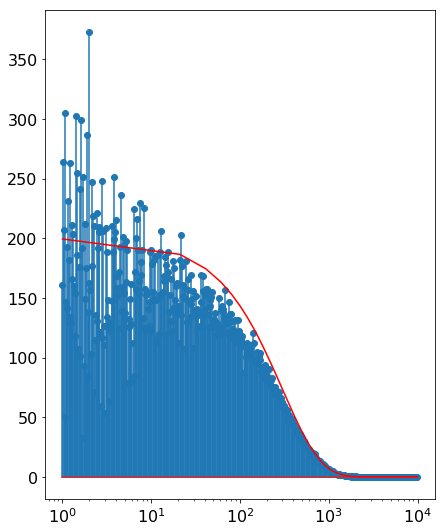

In [375]:
fig, ax = plt.subplots(1,1)
ene = np.linspace(1, 10000, 500) # keV
Eo = 300 # kev
key = 'Energy, from source, kev'
counts = np.exp(-ene/Eo)
ax.plot(ene, 200*counts, zorder=101, color='red')
ax.stem(axes[key][:-1], hists[key][:-1]/np.diff(axes[key]),zorder=100, alpha=0.7)
ax.set_xscale('log')


In [368]:
np.diff(axes[key])

array([1.86289902e-02, 1.89760295e-02, 1.93295338e-02, 1.96896235e-02,
       2.00564213e-02, 2.04300522e-02, 2.08106434e-02, 2.11983247e-02,
       2.15932281e-02, 2.19954881e-02, 2.24052418e-02, 2.28226289e-02,
       2.32477914e-02, 2.36808743e-02, 2.41220251e-02, 2.45713940e-02,
       2.50291343e-02, 2.54954018e-02, 2.59703554e-02, 2.64541569e-02,
       2.69469711e-02, 2.74489660e-02, 2.79603125e-02, 2.84811849e-02,
       2.90117606e-02, 2.95522204e-02, 3.01027484e-02, 3.06635322e-02,
       3.12347629e-02, 3.18166350e-02, 3.24093467e-02, 3.30131001e-02,
       3.36281009e-02, 3.42545584e-02, 3.48926863e-02, 3.55427018e-02,
       3.62048264e-02, 3.68792858e-02, 3.75663096e-02, 3.82661320e-02,
       3.89789914e-02, 3.97051307e-02, 4.04447972e-02, 4.11982429e-02,
       4.19657246e-02, 4.27475037e-02, 4.35438465e-02, 4.43550244e-02,
       4.51813137e-02, 4.60229959e-02, 4.68803579e-02, 4.77536916e-02,
       4.86432947e-02, 4.95494701e-02, 5.04725267e-02, 5.14127789e-02,
      

In [230]:
for child in e:
    print child.tag, child.attrib

implementation {'version': '4.2.1', 'package': 'tools'}
histogram1d {'path': '/', 'name': '0', 'title': 'Energy, in detector log(/keV)'}
histogram1d {'path': '/', 'name': '1', 'title': 'Energy, from source log(/keV)'}


In [226]:
# Load CSV files:

infile = "build/detector_hists_h1_h1.csv"

# np.loadtxt(infile, delimiter=',', skiprows=7)

with open(infile,'r') as file:
    for a in range(10):
        x =file.readline()
        print x

IOError: [Errno 2] No such file or directory: 'build/detector_hists_h1_h1.csv'

In [231]:
print axis_info


{'max': '1000', 'direction': 'x', 'numberOfBins': '100', 'min': '100'}


In [254]:

filename = 'build/doop.xml'
e = xml.etree.cElementTree.parse(filename).getroot()

hists = dict()
axes  = dict()
underflows = dict()
overflows = dict()
for hist in e.findall('histogram1d'):
    axis_info = hist.findall('axis')[0].attrib
    bin_vals = np.linspace(float(axis_info['min']), float(axis_info['max']), int(axis_info['numberOfBins']))
    title = hist.attrib['title']
    print axis_info
    cur_hist = np.zeros_like(bin_vals)
    for cell in hist.findall('data1d')[0]:
        try:
            binN=int(cell.attrib['binNum'])
            binH=int(cell.attrib['height'])
            cur_hist[binN] = binH
        except:
            if 'UNDERFLOW' in cell.attrib['binNum']:
                underflows[title] = int(cell.attrib['height'])
            if 'OVERFLOW' in cell.attrib['binNum']:
                overflows[title] = int(cell.attrib['height'])
    hists[title] = cur_hist
    axes[title]  = bin_vals

    print title, " has", np.sum(cur_hist), "values"

{'max': '3', 'direction': 'x', 'numberOfBins': '100', 'min': '1'}
Energy, from source, kev  has 50000.0 values
{'max': '3', 'direction': 'x', 'numberOfBins': '100', 'min': '1'}
Energy, main detector, kev  has 49821.0 values
{'max': '3', 'direction': 'x', 'numberOfBins': '100', 'min': '1'}
Energy, side detector, kev  has 0.0 values


0

In [410]:
# Let's figure out the source location given an incident angle!
D2R = np.pi/180.
aperture_entry = np.array([0,0,2.5])

r = 2.5
tvec = [0,-1, -2, -3, -4, -5]

origin = aperture_entry + r*np.array([0, np.cos(theta*D2R), np.sin(theta*D2R)])
direction = (origin - aperture_entry)
direction = direction/np.linalg.norm(direction)

for theta in tvec:
    origin = aperture_entry + r*np.array([0, np.sin(theta*D2R), np.cos(theta*D2R)])
    direction = (aperture_entry - origin)
    direction = direction/np.linalg.norm(direction)
    print "# %g deg offset"%theta
    print "/gps/position %2.4g %2.4g %2.4g cm"%(origin[0], origin[1], origin[2])
    print "/gps/direction %2.4g %2.4g %2.4g cm"%(direction[0], direction[1], direction[2])
    print ""

# 0 deg offset
/gps/position  0  0  5 cm
/gps/direction  0  0 -1 cm

# -1 deg offset
/gps/position  0 -0.04363  5 cm
/gps/direction  0 0.01745 -0.9998 cm

# -2 deg offset
/gps/position  0 -0.08725 4.998 cm
/gps/direction  0 0.0349 -0.9994 cm

# -3 deg offset
/gps/position  0 -0.1308 4.997 cm
/gps/direction  0 0.05234 -0.9986 cm

# -4 deg offset
/gps/position  0 -0.1744 4.994 cm
/gps/direction  0 0.06976 -0.9976 cm

# -5 deg offset
/gps/position  0 -0.2179 4.99 cm
/gps/direction  0 0.08716 -0.9962 cm

